In [ ]:
!pip install tensorflow

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
# Load and preprocess the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 10s 0us/step


In [ ]:
# Define the categories
can_fly = [0, 2]  # 0: airplane, 2: bird
cannot_fly = [1, 3, 4, 5, 6, 7, 8, 9]  # 1: automobile, 3: cat, etc.

In [ ]:
def preprocess_labels(labels):
    new_labels = []
    for label in labels:
        if label in can_fly:
            new_labels.append(1)
        else:
            new_labels.append(0)
    return np.array(new_labels)

In [ ]:
y_train_bin = preprocess_labels(y_train)
y_test_bin = preprocess_labels(y_test)

In [ ]:
# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

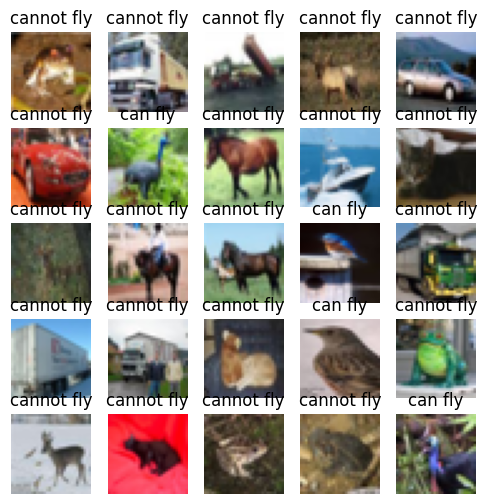

In [ ]:
# Plot some images and their corresponding labels
labels = ['cannot fly', 'can fly']
plt.figure(figsize=(6, 6))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(labels[y_train_bin[i]])
    plt.axis('off')
plt.show()

In [ ]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the CNN model
history = model.fit(x_train, y_train_bin, epochs=15, batch_size=64, validation_split=0.15)

Epoch 1/15
665/665 [==============================] - 62s 93ms/step - loss: 0.1792 - accuracy: 0.9273 - val_loss: 0.3725 - val_accuracy: 0.8453
Epoch 2/15
665/665 [==============================] - 55s 82ms/step - loss: 0.1965 - accuracy: 0.9201 - val_loss: 0.2676 - val_accuracy: 0.9085
Epoch 3/15
665/665 [==============================] - 57s 86ms/step - loss: 0.1715 - accuracy: 0.9307 - val_loss: 0.3288 - val_accuracy: 0.8647
Epoch 4/15
665/665 [==============================] - 57s 86ms/step - loss: 0.1706 - accuracy: 0.9303 - val_loss: 0.2927 - val_accuracy: 0.8960
Epoch 5/15
665/665 [==============================] - 55s 82ms/step - loss: 0.1752 - accuracy: 0.9284 - val_loss: 0.2299 - val_accuracy: 0.9136
Epoch 6/15
665/665 [==============================] - 55s 83ms/step - loss: 0.1638 - accuracy: 0.9351 - val_loss: 0.2448 - val_accuracy: 0.9124
Epoch 7/15
665/665 [==============================] - 55s 83ms/step - loss: 0.1596 - accuracy: 0.9364 - val_loss: 0.2576 - val_accuracy:

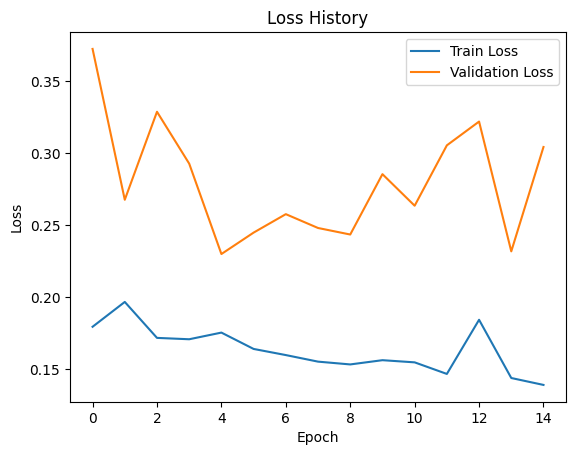

In [ ]:
# Plot training & validation loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test set
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

313/313 [==============================] - 3s 10ms/step


In [ ]:
# Compute evaluation metrics
precision = precision_score(y_test_bin, y_pred)
recall = recall_score(y_test_bin, y_pred)
f1 = f1_score(y_test_bin, y_pred)
accuracy = accuracy_score(y_test_bin, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Accuracy: {accuracy}')

Precision: 0.9246231155778895
Recall: 0.552
F1 Score: 0.691296180338134
Accuracy: 0.9014


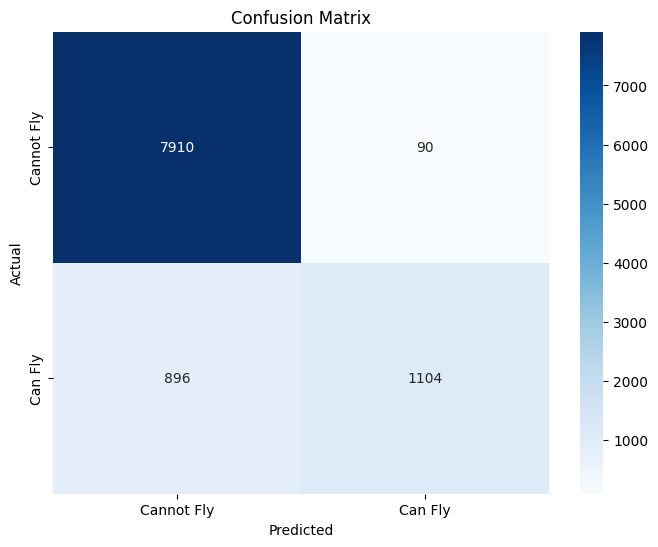

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(y_test_bin, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Cannot Fly', 'Can Fly'], yticklabels=['Cannot Fly', 'Can Fly'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()